## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import libraries needed for the project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# open the data file

data = pd.read_csv('./data/kc_house_data.csv')


## Data explorations

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data = data.dropna()

From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the oclumn a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [6]:

data['sqft_basement'].value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
2010.0       1
1481.0       1
1913.0       1
4820.0       1
248.0        1
Name: sqft_basement, Length: 283, dtype: int64

To proceed with our analysis, we could detete the raws that contain "?", but then we will be losing 454 data points. Consiering that we have 21596 entries, 454 points correspond to a 2.1% of the points. As we want to do the best regression model and consider all the variables, we proceed to delte the values containing "?"

In [7]:
data = data[(data.sqft_basement != '?' )]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  object 
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

We can see that now we have 21143 entries 

In [8]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  float64
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

Above we have confirm that the sqft_basement is now a float.
And we also convert the date to a datetime format

In [10]:
#data['date'] = pd.to_datetime(data['date']).head()
#data.info()

To put a bit more of context, would be great to know where the houses are located. So let's explore the postcodes

In [11]:
data['zipcode'].value_counts()

98038    425
98103    415
98052    410
98042    408
98117    394
        ... 
98010     68
98102     63
98024     58
98148     41
98039     35
Name: zipcode, Length: 70, dtype: int64

In [12]:
data.sort_values('zipcode')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8653,3751600025,5/14/2014,139000.0,3,1.00,1100,17334,1.0,0.0,0.0,...,7,1100,0.0,1978,0.0,98001,47.3003,-122.270,1530,18694
6813,304100010,12/9/2014,269500.0,4,2.25,1700,7056,2.0,0.0,0.0,...,7,1700,0.0,1999,0.0,98001,47.3385,-122.262,1650,6025
14945,6306100190,5/21/2014,220000.0,4,2.50,2160,8005,2.0,0.0,0.0,...,7,2160,0.0,1993,0.0,98001,47.2668,-122.231,1790,8016
14948,2595650170,6/9/2014,367300.0,4,2.75,2190,14937,2.0,0.0,0.0,...,8,2190,0.0,1993,0.0,98001,47.3535,-122.273,1920,11360
19311,3356403400,7/24/2014,159000.0,3,1.00,1360,20000,1.0,0.0,0.0,...,7,1360,0.0,1953,0.0,98001,47.2861,-122.253,1530,9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,7010700976,11/14/2014,505000.0,3,1.00,1100,5400,1.5,0.0,0.0,...,7,1100,0.0,1908,0.0,98199,47.6604,-122.396,1770,4400
11528,2771600550,11/12/2014,950000.0,4,3.50,4030,4200,3.0,0.0,0.0,...,9,4030,0.0,1992,0.0,98199,47.6416,-122.386,2130,5000
6467,2770601462,4/23/2015,503500.0,3,2.50,1810,1750,2.0,0.0,0.0,...,7,1350,460.0,1997,0.0,98199,47.6513,-122.386,1640,1563
9140,369000690,8/12/2014,403504.0,4,1.00,1060,5750,1.0,0.0,0.0,...,6,950,110.0,1904,0.0,98199,47.6562,-122.389,1790,5857


## one by one

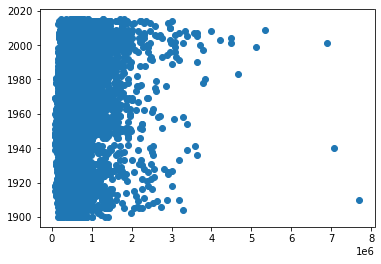

In [13]:
Xa = data['price']
Ya = data['yr_built']


plt.scatter(Xa,Ya)

In [14]:
no_renovated = data[data.yr_renovated == 0]['price']
renovated = data[data.yr_renovated != 0]['price']

# Calculate the 2-sided p-value for a t-test comparing the renovated vs no-renovated groups
from scipy import stats

stats.ttest_ind(no_renovated, renovated, equal_var=False)[1]


4.797932412475557e-18

Based on these results, we decided to select only the houses that are not renovated

In [15]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [16]:
data_new = data.drop(data[data.yr_renovated != 0].index)

data_new

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [17]:
data_new['years_built'] = 2022 - data['yr_built']
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14797 entries, 3 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14797 non-null  int64  
 1   date           14797 non-null  object 
 2   price          14797 non-null  float64
 3   bedrooms       14797 non-null  int64  
 4   bathrooms      14797 non-null  float64
 5   sqft_living    14797 non-null  int64  
 6   sqft_lot       14797 non-null  int64  
 7   floors         14797 non-null  float64
 8   waterfront     14797 non-null  float64
 9   view           14797 non-null  float64
 10  condition      14797 non-null  int64  
 11  grade          14797 non-null  int64  
 12  sqft_above     14797 non-null  int64  
 13  sqft_basement  14797 non-null  float64
 14  yr_built       14797 non-null  int64  
 15  yr_renovated   14797 non-null  float64
 16  zipcode        14797 non-null  int64  
 17  lat            14797 non-null  float64
 18  long  

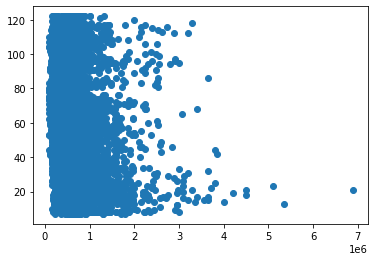

In [18]:
Xa = data_new['price']
Ya = data_new['years_built']

plt.scatter(Xa,Ya)

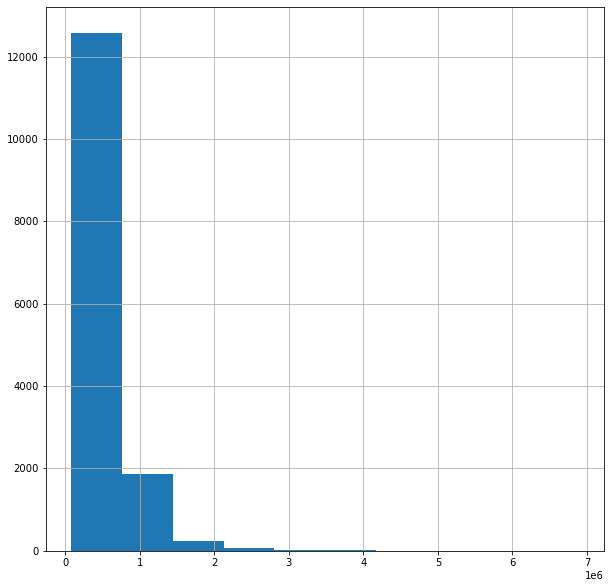

In [19]:
df = data_new['price']

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax);

In [20]:
zipcode_dummies = pd.get_dummies(data_new['zipcode'], prefix='zip', drop_first=True)

In [21]:
preprocessed = data.drop(['zipcode'], axis=1)
preprocessed = pd.concat([data_new['price'], zipcode_dummies], axis=1)
preprocessed.head(10)




,price,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
3,604000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1230000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,229500.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,323000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,468000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,400000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,530000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,650000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,395000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        11:28:48   Log-Likelihood:            -2.0606e+05
No. Observations:               14797   AIC:                         4.123e+05
Df Residuals:                   14727   BIC:                         4.128e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.722e+05   1.73e+04     15.734      0.000    2.38e+05    3.06e+05
zip_98002  -3.797e+04   2.85e+04     -1.332      0.183   -9.38e+04    1.79e+04
zip_98003   1.628e+04   2.54e+04      0.642      0.521   -3.35e+04     6.6e+04
zip_98004   1.058e+06   2.57e+04     41.235      0.000    1.01e+06    1.11e+06
zip_98005   5.403e+05   2.98e+04     18.151      0.000    4.82e+05    5.99e+05
zip_98006   5.916e+05   2.27e+04     26.052      0.000    5.47e+05    6.36e+05
zip_98007    3.48e+05   3.25e+04     10.711      0.000    2.84e+05    4.12e+05
zip_98008   3.525e+05   2.57e+04     13.731      0.000    3.02e+05    4.03e+05
zip_98010   1.577e+05   3.95e+04      3.989      0.000    8.02e+04    2.35e+05
zip_98011   2.231e+05   2.92e+04      7.650      0.000    1.66e+05     2.8e+05
zip_98014   2.254e+05   3.35e+04      6.725      0.000     1.6e+05    2.91e+05
zip_98019   1.608e+05      3e+04      5.360      0.000    1.02e+05     2.2e+05
zip_98022   4.677e+04   2.77e+04      1.686      0.092   -7606.423    1.01e+05
zip_98023   1.444e+04   2.25e+04      0.643      0.520   -2.96e+04    5.85e+04
zip_98024   3.107e+05   4.07e+04      7.632      0.000    2.31e+05    3.91e+05
zip_98027    3.44e+05   2.35e+04     14.638      0.000    2.98e+05     3.9e+05
zip_98028   1.916e+05   2.57e+04      7.463      0.000    1.41e+05    2.42e+05
zip_98029    3.36e+05   2.46e+04     13.663      0.000    2.88e+05    3.84e+05
zip_98030   2.771e+04   2.66e+04      1.042      0.297   -2.44e+04    7.98e+04
zip_98031   2.813e+04    2.6e+04      1.084      0.278   -2.27e+04     7.9e+04
zip_98032  -1.919e+04   3.24e+04     -0.593      0.553   -8.26e+04    4.43e+04
zip_98033   5.237e+05   2.34e+04     22.405      0.000    4.78e+05    5.69e+05
zip_98034     2.5e+05   2.21e+04     11.307      0.000    2.07e+05    2.93e+05
zip_98038   9.153e+04   2.18e+04      4.201      0.000    4.88e+04    1.34e+05
zip_98039   2.015e+06   5.49e+04     36.697      0.000    1.91e+06    2.12e+06
zip_98040   8.877e+05   2.65e+04     33.495      0.000    8.36e+05     9.4e+05
zip_98042   4.246e+04    2.2e+04      1.931      0.054    -641.499    8.56e+04
zip_98045   1.603e+05   2.77e+04      5.779      0.000    1.06e+05    2.15e+05
zip_98052   3.801e+05   2.19e+04     17.323      0.000    3.37e+05    4.23e+05
zip_98053   3.933e+05   2.36e+04     16.668      0.000    3.47e+05     4.4e+05
zip_98055   3.178e+04   2.62e+04      1.212      0.225   -1.96e+04    8.32e+04
zip_98056   1.522e+05   2.34e+04      6.516      0.000    1.06e+05    1.98e+05
zip_98058   7.757e+04   2.32e+04      3.341      0.001    3.21e+04    1.23e+05
zip_98059   2.214e+05   2.31e+04      9.604      0.000    1.76e+05    2.67e+05
zip_98065   2.627e+05   2.53e+04     10.381      0.000    2.13e+05    3.12e+05
zip_98070   1.983e+05   3.46e+04      5.739      0.000    1.31e+05    2.66e+05
zi

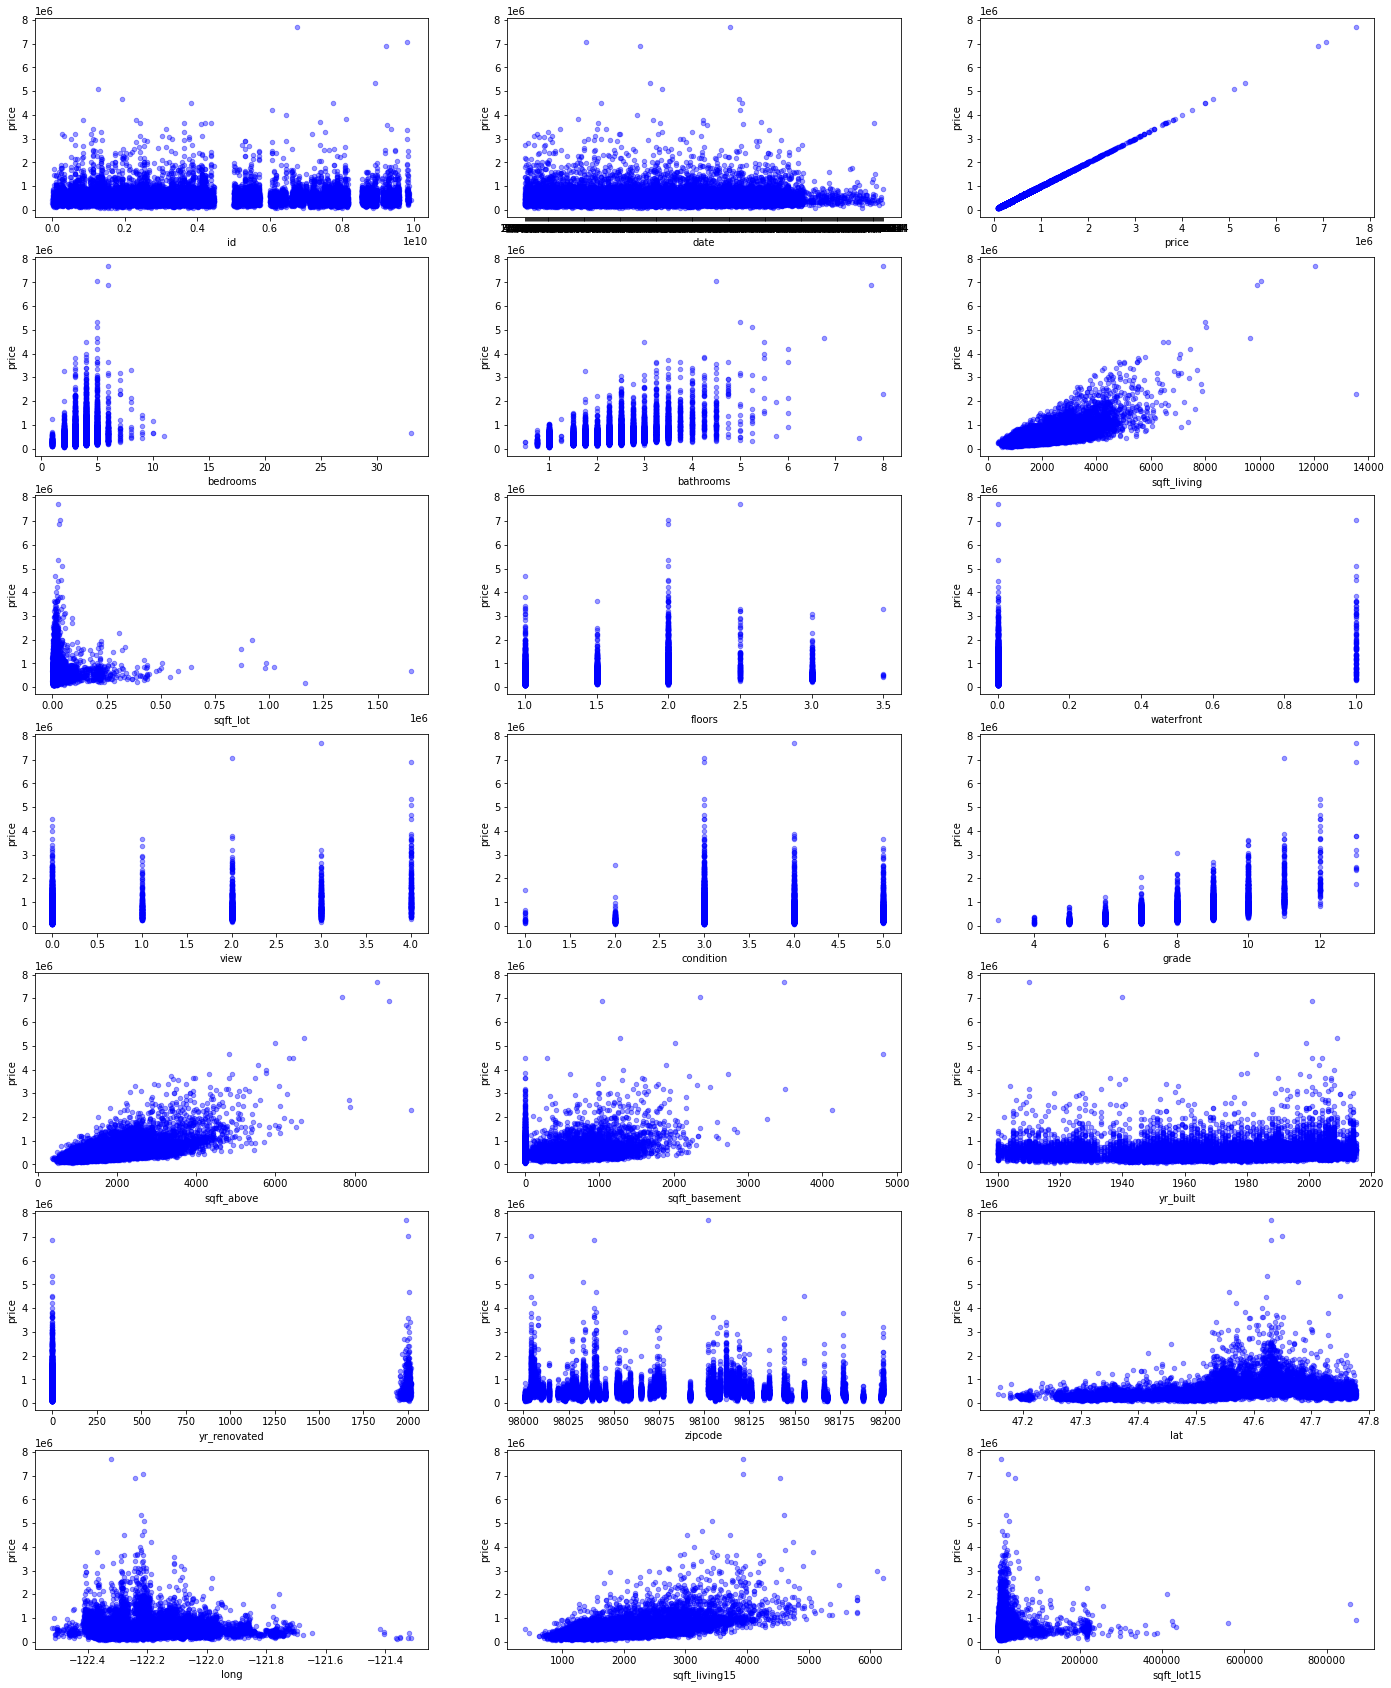

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

In [24]:
continuous_norm = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'years_built']
categoricals_temp = ['waterfront', 'condition', 'grade',]





bedroomsNumber** -  of Bedrooms/House
bathroomsNumber** -  of bathrooms/bedrooms
sqft_livingsquare** -  footage of the home
sqft_lotsquare** -  footage of the lot
floorsTotal** -  floors (levels) in house
waterfront** - House which has a view to a waterfront
condition** - How good the condition is ( Overall )
grade** - overall grade given to the housing unit, based on King County grading system
zipcode** - zip

In [25]:
waterfront_dummies = pd.get_dummies(data_new['waterfront'], prefix='wf', drop_first=True)
condition_dummies = pd.get_dummies(data_new['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data_new['grade'], prefix='grade', drop_first=True)





preprocessed = data.drop(['waterfront', 'condition','grade'], axis=1)
preprocessed = pd.concat([data_new['price'], waterfront_dummies, condition_dummies, grade_dummies], axis=1)
preprocessed.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 14797 entries, 3 to 21596
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     14797 non-null  float64
 1   wf_1.0    14797 non-null  uint8  
 2   cd_2      14797 non-null  uint8  
 3   cd_3      14797 non-null  uint8  
 4   cd_4      14797 non-null  uint8  
 5   cd_5      14797 non-null  uint8  
 6   grade_4   14797 non-null  uint8  
 7   grade_5   14797 non-null  uint8  
 8   grade_6   14797 non-null  uint8  
 9   grade_7   14797 non-null  uint8  
 10  grade_8   14797 non-null  uint8  
 11  grade_9   14797 non-null  uint8  
 12  grade_10  14797 non-null  uint8  
 13  grade_11  14797 non-null  uint8  
 14  grade_12  14797 non-null  uint8  
 15  grade_13  14797 non-null  uint8  
dtypes: float64(1), uint8(15)
memory usage: 448.0 KB


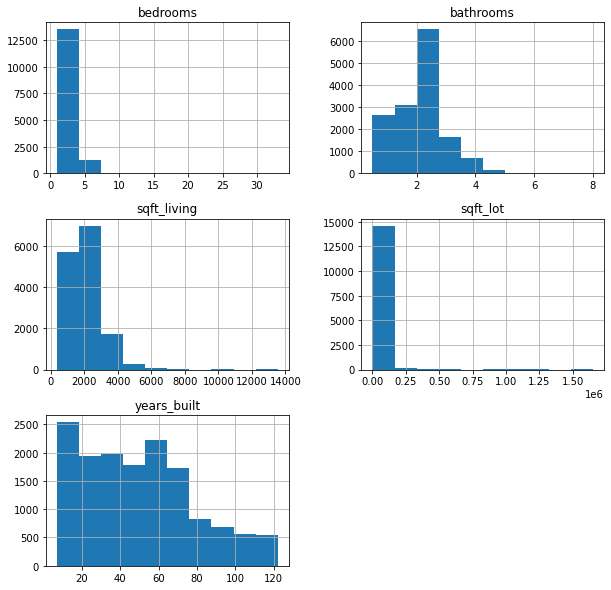

In [26]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_new[continuous_norm].hist(ax = ax);

In [27]:
# Log transform and normalize
data_cont = data_new[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14797 entries, 3 to 21596
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms_log     14797 non-null  float64
 1   bathrooms_log    14797 non-null  float64
 2   sqft_living_log  14797 non-null  float64
 3   sqft_lot_log     14797 non-null  float64
 4   years_built_log  14797 non-null  float64
dtypes: float64(5)
memory usage: 693.6 KB


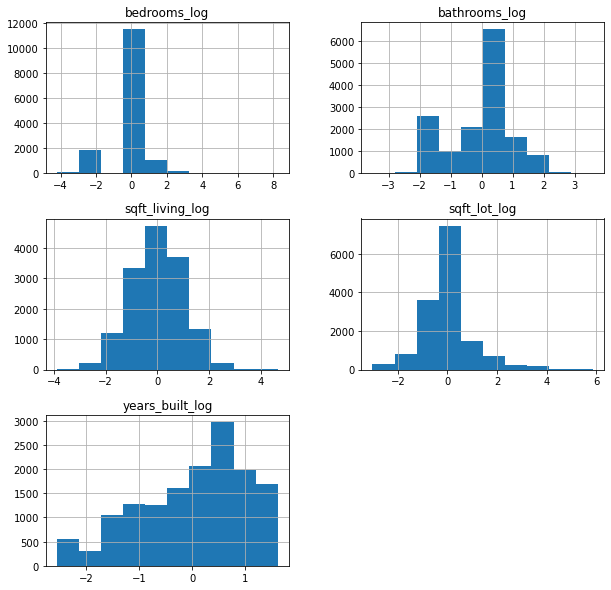

In [28]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_log_norm.hist(ax = ax);

In [29]:
preprocessed = pd.concat([preprocessed,data_log_norm], axis=1)

preprocessed

,price,wf_1.0,cd_2,cd_3,cd_4,cd_5,grade_4,grade_5,grade_6,grade_7,...,grade_9,grade_10,grade_11,grade_12,grade_13,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,years_built_log
3,604000.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0.738323,1.079562,0.073536,-0.525298,0.501657
4,510000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.286617,0.038814,-0.291383,0.003783,-0.206920
5,1230000.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.738323,2.120310,2.481425,2.798147,-0.949091
8,229500.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,-0.286617,-1.740356,-0.154508,-0.082748,0.623820
9,323000.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,-0.286617,0.611579,-0.012557,-0.225950,-1.094500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.286617,0.611579,-0.880285,-2.015357,-1.538185
21592,360000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.286617,0.611579,-0.512786,-2.163774,-1.645855
21593,400000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.738323,0.611579,0.462488,-0.359218,-2.351242
21594,402101.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,-1.731188,-2.478779,-1.472638,-1.968654,-1.645855


In [30]:



X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        11:29:33   Log-Likelihood:            -2.0250e+05
No. Observations:               14797   AIC:                         4.050e+05
Df Residuals:                   14776   BIC:                         4.052e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.79e+05   2.19e+05      2.188      0.029       5e+04    9.08e+05
wf_1.0           8.128e+05   2.29e+04     35.532      0.000    7.68e+05    8.58e+05
cd_2            -4.436e+04   5.38e+04     -0.825      0.410    -1.5e+05    6.11e+04
cd_3             -4.44e+04   5.06e+04     -0.877      0.380   -1.44e+05    5.48e+04
cd_4            -1.867e+04   5.06e+04     -0.369      0.712   -1.18e+05    8.05e+04
cd_5             4.193e+04   5.09e+04      0.824      0.410   -5.78e+04    1.42e+05
grade_4         -2.038e+04    2.2e+05     -0.093      0.926   -4.51e+05     4.1e+05
grade_5         -8.121e+04   2.13e+05     -0.380      0.704      -5e+05    3.37e+05
grade_6         -6.572e+04   2.13e+05     -0.309      0.758   -4.83e+05    3.52e+05
grade_7         -2.985e+04   2.13e+05     -0.140      0.889   -4.47e+05    3.88e+05
grade_8          6.652e+04   2.13e+05      0.312      0.755   -3.51e+05    4.84e+05
grade_9          2.549e+05   2.13e+05      1.196      0.232   -1.63e+05    6.73e+05
grade_10         4.898e+05   2.13e+05      2.297      0.022    7.18e+04    9.08e+05
grade_11         8.004e+05   2.14e+05      3.748      0.000    3.82e+05    1.22e+06
grade_12         1.523e+06   2.15e+05      7.084      0.000     1.1e+06    1.94e+06
grade_13         2.478e+06   2.25e+05     11.020      0.000    2.04e+06    2.92e+06
bedrooms_log    -2.155e+04   2403.710     -8.963      0.000   -2.63e+04   -1.68e+04
bathrooms_log    1.969e+04   3179.254      6.195      0.000    1.35e+04    2.59e+04
sqft_living_log  1.228e+05   3842.083     31.967      0.000    1.15e+05     1.3e+05
sqft_lot_log     -4.34e+04   1995.672    -21.747      0.000   -4.73e+04   -3.95e+04
years_built_log   7.35e+04   2527.570     29.078      0.000    6.85e+04    7.85e+04
==============================================================================
Omnibus:                     8575.980   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266050.931
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      23.285   Cond. No.                         665.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
preprocessed.corr()
abs(preprocessed.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(cd_4, cd_3)",0.808370
"(sqft_living_log, bathrooms_log)",0.759143


In [32]:
preprocessed2 = preprocessed.copy()
preprocessed2 = preprocessed2.drop(['bathrooms_log','cd_4', 'cd_3'], axis=1)



In [33]:
X2 = preprocessed2.drop('price', axis=1)
y2 = preprocessed2['price']

import statsmodels.api as sm
X_int2 = sm.add_constant(X2)
model = sm.OLS(y2,X_int2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1540.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        11:29:43   Log-Likelihood:            -2.0254e+05
No. Observations:               14797   AIC:                         4.051e+05
Df Residuals:                   14779   BIC:                         4.053e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.402e+05   2.13e+05      2.062      0.039    2.17e+04    8.59e+05
wf_1.0           8.161e+05   2.29e+04     35.598      0.000    7.71e+05    8.61e+05
cd_2            -1.143e+04   1.94e+04     -0.588      0.557   -4.96e+04    2.67e+04
cd_5             7.847e+04   6669.022     11.767      0.000    6.54e+04    9.15e+04
grade_4         -1.403e+04    2.2e+05     -0.064      0.949   -4.46e+05    4.18e+05
grade_5          -8.11e+04   2.14e+05     -0.379      0.705   -5.01e+05    3.38e+05
grade_6         -6.945e+04   2.13e+05     -0.325      0.745   -4.88e+05    3.49e+05
grade_7         -2.792e+04   2.13e+05     -0.131      0.896   -4.46e+05     3.9e+05
grade_8          7.134e+04   2.14e+05      0.334      0.738   -3.47e+05     4.9e+05
grade_9          2.563e+05   2.14e+05      1.200      0.230   -1.62e+05    6.75e+05
grade_10         4.906e+05   2.14e+05      2.295      0.022    7.16e+04     9.1e+05
grade_11          8.02e+05   2.14e+05      3.746      0.000    3.82e+05    1.22e+06
grade_12         1.526e+06   2.15e+05      7.083      0.000     1.1e+06    1.95e+06
grade_13          2.48e+06   2.25e+05     11.003      0.000    2.04e+06    2.92e+06
bedrooms_log    -1.926e+04   2388.671     -8.064      0.000   -2.39e+04   -1.46e+04
sqft_living_log  1.342e+05   3428.101     39.134      0.000    1.27e+05    1.41e+05
sqft_lot_log    -4.414e+04   1982.661    -22.261      0.000    -4.8e+04   -4.02e+04
years_built_log  7.217e+04   2173.802     33.200      0.000    6.79e+04    7.64e+04
==============================================================================
Omnibus:                     8591.820   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266316.093
Skew:                           2.245   Prob(JB):                         0.00
Kurtosis:                      23.293   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.6345565524402431

In [35]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X2.columns, 2)

data = X2.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y2, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
Top 3 interactions: []


In [36]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

final = preprocessed2.copy()
final['bedrooms_log*sqft_living_log'] = final['bedrooms_log'] * final['sqft_living_log']
final['cd_5*grade_7'] = final['cd_5'] * final['grade_7']
final['grade_7*sqft_living_log'] = final['grade_7'] * final['sqft_living_log']

final_model = np.mean(cross_val_score(regression, final, y2, scoring='r2', cv=crossvalidation))
final_model

1.0

In [37]:
X2 = final.drop('price', axis=1)
y2 = final['price']

import statsmodels.api as sm
X_int2 = sm.add_constant(X2)
model = sm.OLS(y2,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1386.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        11:29:52   Log-Likelihood:            -2.0227e+05
No. Observations:               14797   AIC:                         4.046e+05
Df Residuals:                   14776   BIC:                         4.047e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          1.69e+05   2.11e+05      0.802      0.422   -2.44e+05    5.82e+05
wf_1.0                        8.179e+05   2.25e+04     36.337      0.000    7.74e+05    8.62e+05
cd_2                         -1.935e+04   1.91e+04     -1.013      0.311   -5.68e+04    1.81e+04
cd_5                           1.25e+05   9165.527     13.636      0.000    1.07e+05    1.43e+05
grade_4                        1.15e+05   2.16e+05      0.531      0.595   -3.09e+05    5.39e+05
grade_5                       1.586e+05   2.11e+05      0.753      0.451   -2.54e+05    5.71e+05
grade_6                       2.018e+05    2.1e+05      0.960      0.337    -2.1e+05    6.14e+05
grade_7                       2.267e+05   2.11e+05      1.076      0.282   -1.86e+05     6.4e+05
grade_8                       3.187e+05   2.11e+05      1.513      0.130   -9.42e+04    7.32e+05
grade_9                       4.735e+05   2.11e+05      2.246      0.025    6.03e+04    8.87e+05
grade_10                       6.82e+05   2.11e+05      3.233      0.001    2.68e+05     1.1e+06
grade_11                       9.56e+05   2.11e+05      4.525      0.000    5.42e+05    1.37e+06
grade_12                      1.643e+06   2.13e+05      7.727      0.000    1.23e+06    2.06e+06
grade_13                      2.549e+06   2.22e+05     11.469      0.000    2.11e+06    2.98e+06
bedrooms_log                 -1.216e+04   2387.370     -5.093      0.000   -1.68e+04   -7479.797
sqft_living_log               1.658e+05   4266.349     38.874      0.000    1.57e+05    1.74e+05
sqft_lot_log                 -4.477e+04   1963.170    -22.804      0.000   -4.86e+04   -4.09e+04
years_built_log               6.843e+04   2143.257     31.928      0.000    6.42e+04    7.26e+04
bedrooms_log*sqft_living_log  2.771e+04   1534.705     18.057      0.000    2.47e+04    3.07e+04
cd_5*grade_7                  -8.97e+04   1.27e+04     -7.064      0.000   -1.15e+05   -6.48e+04
grade_7*sqft_living_log      -6.061e+04   5321.852    -11.389      0.000    -7.1e+04   -5.02e+04
==============================================================================
Omnibus:                     8094.997   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226221.074
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      21.694   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

based on this data, we are going to select only the ones whose condition is cd = 2 and grade <= 8

In [45]:
improvement_1 = data_new[(data_new.condition <= 2) & (data_new.grade <= 8) & (data_new.waterfront == 0)]
#renovated = data[data.yr_renovated != 0]['price']
improvement_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_built
36,9435300030,5/28/2014,550000.0,4,1.0,1660,34848,1.0,0.0,0.0,...,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467,89
38,7895500070,2/13/2015,240000.0,4,1.0,1220,8075,1.0,0.0,0.0,...,890,330.0,1969,0.0,98001,47.3341,-122.282,1290,7800,53
242,1868901275,1/27/2015,455000.0,2,1.0,1430,5000,1.5,0.0,0.0,...,1430,0.0,1925,0.0,98115,47.6727,-122.299,1450,3750,97
328,1665400045,4/28/2015,186375.0,3,1.0,1000,7636,1.0,0.0,0.0,...,1000,0.0,1952,0.0,98166,47.4720,-122.344,1150,7600,70
380,1726059053,9/16/2014,270000.0,2,1.5,1380,209959,1.0,0.0,0.0,...,1380,0.0,1954,0.0,98011,47.7461,-122.195,3130,19868,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,1324079029,3/17/2015,200000.0,3,1.0,960,213008,1.0,0.0,0.0,...,960,0.0,1933,0.0,98024,47.5621,-121.862,1520,57499,89
19284,7883606725,11/11/2014,174900.0,3,1.0,1100,6000,1.5,0.0,0.0,...,1100,0.0,1926,0.0,98108,47.5279,-122.318,960,5880,96
19348,9485920120,8/29/2014,290000.0,4,2.5,2340,52272,2.0,0.0,0.0,...,2340,0.0,1978,0.0,98042,47.3468,-122.091,2480,40500,44
19433,2023059052,5/4/2015,450000.0,3,1.0,1350,92721,1.0,0.0,0.0,...,1200,150.0,1946,0.0,98055,47.4657,-122.198,1860,8096,76


In [46]:
continuous_norm = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'years_built']



In [50]:
# Log transform and normalize
data_cont = improvement_1[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)


data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 36 to 19496
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms_log     138 non-null    float64
 1   bathrooms_log    138 non-null    float64
 2   sqft_living_log  138 non-null    float64
 3   sqft_lot_log     138 non-null    float64
 4   years_built_log  138 non-null    float64
dtypes: float64(5)
memory usage: 10.5 KB


In [51]:
preprocessed = pd.concat([improvement_1['price'], data_log_norm], axis=1)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 36 to 19496
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            138 non-null    float64
 1   bedrooms_log     138 non-null    float64
 2   bathrooms_log    138 non-null    float64
 3   sqft_living_log  138 non-null    float64
 4   sqft_lot_log     138 non-null    float64
 5   years_built_log  138 non-null    float64
dtypes: float64(6)
memory usage: 11.6 KB


In [52]:
X2 = preprocessed.drop('price', axis=1)
y2 = preprocessed['price']

import statsmodels.api as sm
X_int2 = sm.add_constant(X2)
model = sm.OLS(y2,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     5.435
Date:                Mon, 30 May 2022   Prob (F-statistic):           0.000140
Time:                        11:40:49   Log-Likelihood:                -1856.5
No. Observations:                 138   AIC:                             3725.
Df Residuals:                     132   BIC:                             3743.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.116e+05   1.47e+04     21.259      0.000    2.83e+05    3.41e+05
bedrooms_log    -2.362e+04   2.05e+04     -1.154      0.250   -6.41e+04    1.68e+04
bathrooms_log    3.017e+04    2.1e+04      1.438      0.153   -1.13e+04    7.17e+04
sqft_living_log   7.78e+04   2.31e+04      3.374      0.001    3.22e+04    1.23e+05
sqft_lot_log    -5493.8653   1.55e+04     -0.356      0.723   -3.61e+04    2.51e+04
years_built_log  4.208e+04    1.8e+04      2.337      0.021    6458.891    7.77e+04
==============================================================================
Omnibus:                      110.349   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1270.312
Skew:                           2.713   Prob(JB):                    1.43e-276
Kurtosis:                      16.838   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Exploring the zipcodes, it feels that we are talking about houses in Washington state, usa

## Categorical variables

One of the next steps will be to unesrtand which columns containg categorical values, and for this reason we create a scateter plot against price (which is our variable of interest)

From these graphs and the information enclosed in the document column_names, we can conclude that "Waterfront", "view", "condition", "grade" and "zipcode" are categorical values

In [ ]:
continuous_norm = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'lat', 'sqft_living15', 'sqft_lot15' ]
categoricals_temp = ['waterfront', 'view', 'condition', 'grade', 'yr_renovated','yr_built']
continous_no_norm = ['sqft_basement',  'long']


#sqft_basement, yr_renovated, long -> I remove these 3 because they have 0 and I can

In [ ]:
#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

#waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
#view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
#condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
#grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


In [ ]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
yr_renovated_dummies = pd.get_dummies(data['yr_renovated'], prefix='yr_r', drop_first=True)
yr_built_dummies = pd.get_dummies(data['yr_built'], prefix='yr_b', drop_first=True)




preprocessed = data.drop(['waterfront','view','condition','grade', 'yr_renovated', 'yr_built' ], axis=1)
preprocessed = pd.concat([data['price'], waterfront_dummies, view_dummies, condition_dummies, grade_dummies, yr_renovated_dummies, yr_built_dummies], axis=1)
preprocessed.head(10)



In [ ]:
data.sqft_basement.value_counts()

In [ ]:
 data.yr_renovated.value_counts()


In [ ]:
 data.long.value_counts()



In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data[continuous_norm].hist(ax = 
                           ax);

In [ ]:
# Log transform and normalize
data_cont = data[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()


In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_log_norm.hist(ax = ax);

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
data[continous_no_norm].hist(ax = ax);



In [ ]:
# Log transform and normalize
data_cont2 = data[continous_no_norm]
norm_names = [f'{column}_norm' for column in data_cont2.columns]
data_cont2.columns=norm_names

# log features
#log_names = [f'{column}_log' for column in data_cont.columns]
#data_log = np.log(data_cont)
#data_log.columns = log_names
# normalize (subract mean and divide by std)
#def normalize(feature):
 #   return (feature - feature.mean()) / feature.std()

data_cont2_norm = data_cont2.apply(normalize)

data_cont2_norm.head()



In [ ]:
# Log transform and normalize
data_cont2 = data[continous_no_norm]

# log features
log_names2 = [f'{column}_log' for column in data_cont2.columns]
data_log2 = np.log(data_cont2)
data_log2.columns = log_names2


data_log_norm2 = data_log2.apply(normalize)

data_log_norm2.info()



In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
data_cont2_norm.hist(ax = ax);



In [ ]:
long = data['long']
scaled_long = (long-min(long))/(max(long)-min(long))

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
scaled_long.hist(ax = ax);



In [ ]:
sqft_basement = data['sqft_basement']
sqft_basement_long = (long-min(sqft_basement))/(max(sqft_basement)-min(sqft_basement))

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
sqft_basement_long.hist(ax = ax);

In [ ]:
preprocessed = pd.concat([preprocessed, data_log_norm, data_cont2_norm], axis=1)
preprocessed.head(10)




In [ ]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [ ]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

In [ ]:
preprocessed.corr()

In [ ]:
abs(preprocessed.corr()) > 0.75

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.75) & (df.cc <1)]

In [ ]:
import seaborn as sns
sns.heatmap(preprocessed.corr(), center=0);

In [ ]:
preprocessed2 = preprocessed.copy()
preprocessed2 = preprocessed2.drop(['sqft_living_log','sqft_lot_log','cd_4', 'bathrooms_log'], axis=1)



In [ ]:
X2 = preprocessed2.drop('price', axis=1)
y2 = preprocessed2['price']


X_int2 = sm.add_constant(X2)
model = sm.OLS(y2,X_int2).fit()
model.summary()

In [ ]:
#https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

preprocessed3 = preprocessed[list(preprocessed.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(preprocessed3.values, i) for i in range(preprocessed3.shape[1])]
vif_info['Column'] = preprocessed3.columns
vif_info.sort_values('VIF', ascending=False).head(20)




In [ ]:


preprocessed3['GradeDiff'] = preprocessed3['grade_7'] - preprocessed3['grade_8']-preprocessed3['grade_9'] - preprocessed3['grade_6'] - preprocessed3['grade_10'] - preprocessed3['grade_11']-preprocessed3['grade_5']
preprocessed3['cDiff'] = preprocessed3['cd_3'] - preprocessed3['cd_4']- preprocessed3['cd_5']- preprocessed3['cd_2']
preprocessed3['yr_b_Diff'] = preprocessed3['yr_b_2014'] - preprocessed3['yr_b_2006']- preprocessed3['yr_b_2005']- preprocessed3['yr_b_2007']- preprocessed3['yr_b_2003']


preprocessed3 = preprocessed3.drop(['sqft_living_log','sqft_lot_log','sqft_lot15_log','grade_7', 'grade_8', 'grade_9', 'grade_6', 'grade_10', 'grade_11', 'grade_5', 'cd_3', 'cd_4', 'cd_5', 'cd_2', 'yr_b_2014', 'yr_b_2006','yr_b_2005','yr_b_2007','yr_b_2003'], axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(preprocessed3.values, i) for i in range(preprocessed3.shape[1])]
vif_info['Column'] = preprocessed3.columns
vif_info.sort_values('VIF', ascending=False).head(20)


In [ ]:
preprocessed3 = preprocessed3.dropna()
preprocessed3

In [ ]:


X3 = preprocessed3.head().drop('price', axis=1)
y3 = preprocessed3.head()['price']

X3_int = sm.add_constant(X3)
model = sm.OLS(y3,X3_int,missing='drop').fit()
model.summary()

# OLD

In [ ]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

In [ ]:
#data2 = data.drop(['waterfront','view','condition','grade'], axis=1)
data3 = pd.concat([data2,data_cont2_norm,data_log_norm], axis=1)
data3.head()

In [ ]:
data3 = data3.dropna(how='any')
data3


In [ ]:
X2 = data3.drop('price', axis=1)
y2 = data3['price']

In [ ]:
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

In [ ]:
data3.corr()

In [ ]:
abs(data3.corr()) > 0.75

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.75) & (df.cc <1)]

In [ ]:
import seaborn as sns
sns.heatmap(data3.corr(), center=0);

In [ ]:
data3.info()

In [ ]:
data3

In [ ]:
#https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X4 = data3[list(data3.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif_info['Column'] = X4.columns
vif_info.sort_values('VIF', ascending=False)




In [ ]:
data3['GradeDiff'] = data3['grade_7'] - data3['grade_8']-data3['grade_9'] - data3['grade_6'] - data3['grade_10'] - data3['grade_11']-data3['grade_5']
data3['cDiff'] = data3['cd_3'] - data3['cd_4']- data3['cd_5']- data3['cd_2']

X5 = data3.drop(['grade_7', 'grade_8', 'grade_9', 'grade_6', 'grade_10', 'grade_11', 'grade_5', 'cd_3', 'cd_4', 'cd_5', 'cd_2'], axis=1)

X5.head()


In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

In [ ]:
X5 = X5.drop(['sqft_living_log', 'sqft_above_log', 'sqft_basement','sqft_lot_log'], axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

In [ ]:
X6 = X5.drop('price', axis=1)
y6 = X5['price']

In [ ]:
import statsmodels.api as sm
X6_int = sm.add_constant(X6)
model = sm.OLS(y6,X6_int).fit()
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X6, y6, scoring='r2', cv=crossvalidation))
baseline

In [ ]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X6.columns, 2)

data = X6.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y6, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X6.copy()
final['bathrooms_log*sqft_living15_log'] = final['bathrooms_log'] * final['sqft_living15_log']
final['bathrooms_log*GradeDiff'] = final['bathrooms_log'] * final['GradeDiff']
final['sqft_living15_log*GradeDiff'] = final['sqft_living15_log'] * final['GradeDiff']

final_model = np.mean(cross_val_score(regression, final, y6, scoring='r2', cv=crossvalidation))
final_model

In [ ]:
X6

In [ ]:
Xfinal_int = sm.add_constant(final)
model = sm.OLS(y6,final).fit()
model.summary()

In [ ]:
categoricals = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals

There are lots of nans, so what I am going to do is delet the values that have NaN. And then run the model. And then if there are some that are not interested, I will delete them so I can have more values
    

In [ ]:
data.info()

In [ ]:
next_data2 = data.dropna(axis=0)
next_data2

In [ ]:
waterfront_dummies = pd.get_dummies(next_data2['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(next_data2['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(next_data2['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(next_data2['grade'], prefix='grade', drop_first=True)

categoricals2 = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals2


In [ ]:
data_cont = data[continuous]

In [ ]:
data_cont

In [ ]:
preprocessed = pd.concat([data_cont, categoricals])
preprocessed